<a href="https://colab.research.google.com/github/hoseinm444/FanapExercises/blob/main/FFCVS_Dec23_Python_Ex13_Hosein_Mohammadi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ex13 Panorama


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
def show_img_plt(img, fig_height=8, fig_width=6, vmin=0, vmax=255):
    plt.figure(figsize=(fig_height, fig_width), dpi=100)
    plt.imshow(img,cmap='gray', vmin=vmin, vmax=vmax)

In [3]:
def show_mult_img_plt(rows, columns, img_names, vmin=0, vmax=255):
    fig = plt.figure(figsize=(15, 17), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i],cmap='gray', vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title('img_' + str(i))

##01

Stitch the images and create panorama images.

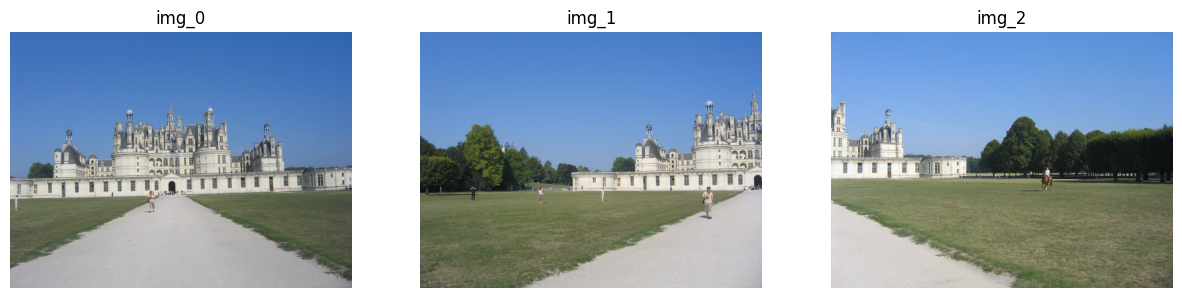

In [4]:
#                                                           images
img1 = cv2.imread('2.JPG')
img2 = cv2.imread('1.JPG')
img3 = cv2.imread('3.JPG')
img1_rgb = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
#                                                        Gray images
img1_gray =cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2_gray =cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img3_gray =cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
#                                                            show the images
show_mult_img_plt(1,3,(img1_rgb,img2_rgb,img3_rgb))

In [5]:
#                                                            use sift to make keypoints
sift = cv2.SIFT_create()
keypoints1, descriptor1 = sift.detectAndCompute(img1_gray, None)
keypoints2, descriptor2 = sift.detectAndCompute(img2_gray, None)

matcher = cv2.BFMatcher()

matches1 =matcher.knnMatch(descriptor1, descriptor2, k=2)
#lowe's ratio!

good_matches12 = []

for m, n  in matches1:
      if m.distance < 0.75*n.distance:
         good_matches12.append(m)

In [6]:
#                                                             stich image 1 and 2
MIN_MATCH_COUNT = 10
if len(good_matches12 ) > MIN_MATCH_COUNT:
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches12] ).reshape(-1, 1, 2)
    dst_pts1 = np.float32([keypoints2[m.trainIdx].pt for m in good_matches12] ).reshape(-1, 1, 2)

    M, mask = cv2.findHomography(src_pts, dst_pts1, cv2.RANSAC, 5.0)
#scale of image
    h, w, _ = img1.shape
    pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
#add homographic matris
    dst = cv2.perspectiveTransform(pts, M)

#red squre around image 2
    image2 = cv2.polylines(img2, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)

    dst = cv2.warpPerspective(img1, M, (img2.shape[1] + img1.shape[1] , img2.shape[0]))
    dst[0:image2.shape[0], 0:image2.shape[1]] = image2

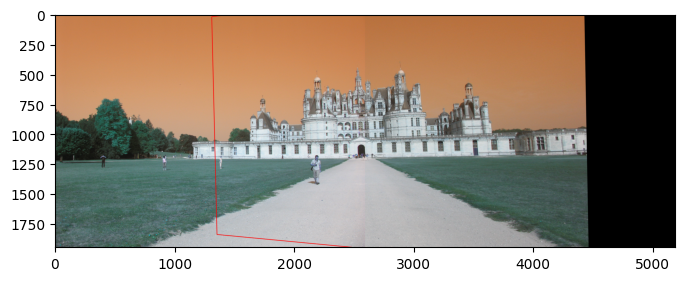

In [7]:
show_img_plt(dst)

In [17]:
keypoints3, descriptor3 = sift.detectAndCompute(img3_gray, None)
keypoints4, descriptor4 = sift.detectAndCompute(dst, None)
matches2 =matcher.knnMatch(descriptor3, descriptor4, k=2)
#lowe's ratio!

good_matches13 = []

for m, n  in matches2:
      if m.distance < 0.75*n.distance:
         good_matches13.append(m)

In [22]:
#                                                                                  stich image 2 and 3

MIN_MATCH_COUNT = 10
if len(good_matches13 ) > MIN_MATCH_COUNT:
    src_pts1 = np.float32([keypoints3[m.queryIdx].pt for m in good_matches13] ).reshape(-1, 1, 2)
    dst_pts2 = np.float32([keypoints4[m.trainIdx].pt for m in good_matches13] ).reshape(-1, 1, 2)

    M1, mask1 = cv2.findHomography(src_pts1, dst_pts2, cv2.RANSAC, 5.0)
#scale of image
    h, w, _ = img3.shape
    pts1 = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
#add homographic matris
    dst1 = cv2.perspectiveTransform(pts1, M1)

#red squre around image 2
    image3 = cv2.polylines(img3.copy(), [np.int32(dst1)], True, 255, 3, cv2.LINE_AA)

    dst1 = cv2.warpPerspective(dst, M, (img3.shape[1] + dst.shape[1] , img3.shape[0]))
    dst1[0:image3.shape[0], 0:image3.shape[1]] = image3

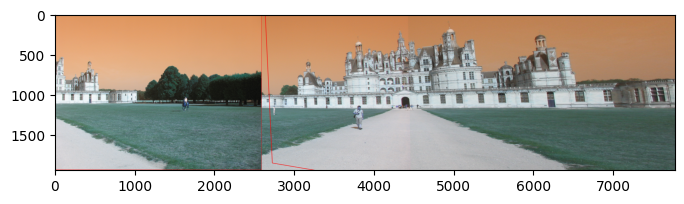

In [23]:
show_img_plt(dst1)